### Arvores de Decisão

Encadeamento de regras formando uma árvore que conduz a decisão. As decisões são feitas ( nos nós) de modo a aumentar a pureza do resultado e separar da maneira mais eficiente.


Vamos treinar duas árvores de decisão, regularizadas de duas formas diferentes ( por profundidade e por número mínimo de folhas)

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz
from dtreeviz.trees import *

iris = load_iris()
X = iris.data[:,2:] # comprimento e largura da petala
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,y)

tree_clf2 = DecisionTreeClassifier(min_samples_leaf=10)
tree_clf2.fit(X,y)

DecisionTreeClassifier(min_samples_leaf=10)

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[Text(0.375, 0.875, 'sepal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.25, 0.375, 'sepal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'sepal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

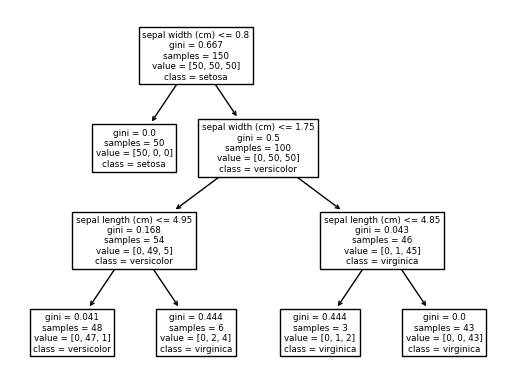

In [18]:
tree.plot_tree(tree_clf, feature_names=iris.feature_names, class_names = iris.target_names )

[Text(0.4444444444444444, 0.9, 'sepal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5555555555555556, 0.7, 'sepal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3333333333333333, 0.5, 'sepal length (cm) <= 4.65\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.2222222222222222, 0.3, 'sepal length (cm) <= 4.45\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.1, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]\nclass = versicolor'),
 Text(0.4444444444444444, 0.3, 'gini = 0.408\nsamples = 14\nvalue = [0, 10, 4]\nclass = versicolor'),
 Text(0.7777777777777778, 0.5, 'sepal width (cm) <= 1.85\ngini = 0.043\nsamples = 46\nva

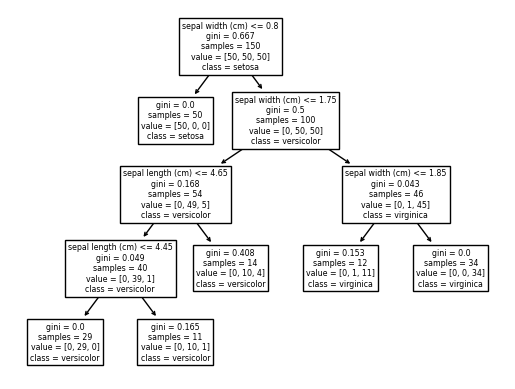

In [19]:
tree.plot_tree(tree_clf2, feature_names=iris.feature_names, class_names = iris.target_names )

Vejamos as fronteiras de decisão dos dois modelos.

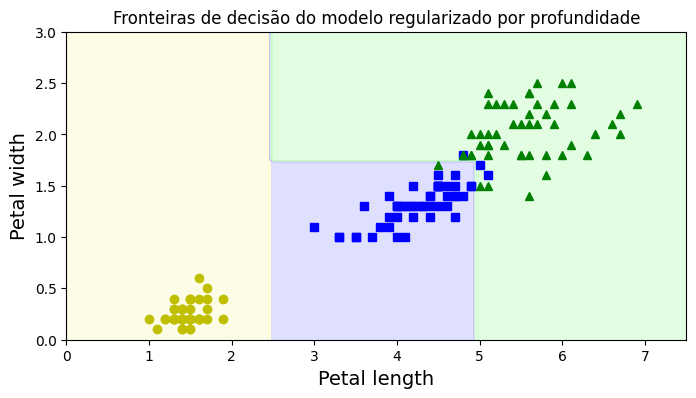

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.title('Fronteiras de decisão do modelo regularizado por profundidade')

plt.show()

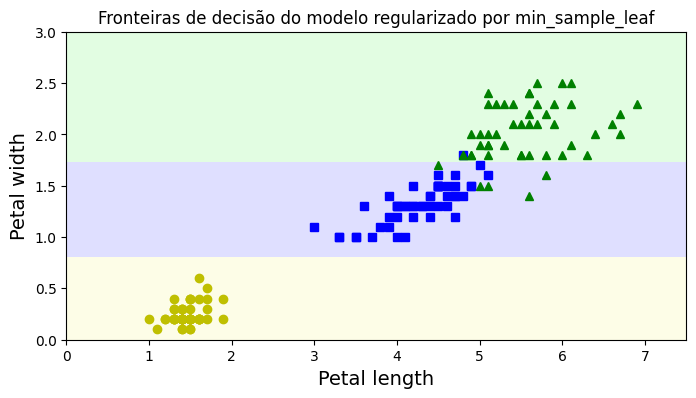

In [27]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf2, X, y)
plt.title('Fronteiras de decisão do modelo regularizado por min_sample_leaf')

plt.show()

#### Estimando as probabilidades das classes

As árvores de decisão conseguem estimar a probabilidade de uma instância pertencer a uma determinada classe. 

In [28]:
tree_clf.classes_

array([0, 1, 2])

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
pd.DataFrame(tree_clf.predict_proba([[5,1.5]]), columns = iris.target_names)

,setosa,versicolor,virginica
0,0.0,0.333333,0.666667


In [32]:
iris.target_names[tree_clf.predict([[5,1.5]])]

array(['virginica'], dtype='<U10')